# SPGR

In [1]:
import version_control

Last run on cashlab03-deb at 2015-03-26 16:29:13.738326

Phypno Version: 01ade7cd0403c2fb7015744a0e2642e9dee19871

Babel==1.3, Cython==0.22, Jinja2==2.7.3, Markdown==2.6.1, MarkupSafe==0.23, Pillow==2.7.0, PyOpenGL==3.1.0, Pygments==2.0.2, Sphinx==1.3.1, alabaster==0.7.3, bash-kernel==0.3, beautifulsoup4==4.3.2, biopython==1.65, certifi==14.05.14, coverage==3.7.1, decorator==3.4.2, docutils==0.12, easydev==0.8.3, ipython==3.0.0, jedi==0.8.1-final0, jsonschema==2.4.0, matplotlib==1.4.3, memory-profiler==0.32, mistune==0.5.1, networkx==1.9.1, nibabel==2.0.0, nitime==0.5, nltk==3.0.2, nose==1.3.4, numpy==1.9.2, numpydoc==0.5, ordereddict==1.1, pandas==0.16.0, pandocfilters==1.2.3, pep8==1.6.2, pexpect==3.3, pockets==0.2.4, psutil==2.2.1, pycurl==7.19.5.1, pyflakes==0.8.1, pyparsing==2.0.3, pyqtgraph==0.9.10, python-dateutil==2.4.1, python-igraph==0.7.1-4, pytz==2015.2, pyzmq==14.5.0, requests==2.6.0, rope-py3k==0.9.4-1, rpy2==2.5.6, scikit-learn==0.15.2, scipy==0.15.1, six==1.9.0, snowbal

In [22]:
from spgr import lg
from logging import INFO
lg.setLevel(INFO)

In [3]:
from multiprocessing import set_start_method
try:
    set_start_method('forkserver')
except RuntimeError:
    pass

## Electrode Locations

### Locations for all the subjects

In [5]:
from pathlib import Path

from numpy import append, asarray, arange, ones

In [20]:
from phypno.attr import Freesurfer, Channels

from spgr.read_data import DATA_DIR, REC_DIR, FS_PATH, ELEC_PATH, get_data, GROUP_DIR, get_chan_used_in_analysis
GROUP_DIR = Path(GROUP_DIR)
DATA_DIR = Path(DATA_DIR)
REC_DIR = Path(REC_DIR)

In [7]:
images_dir = GROUP_DIR.joinpath('images').joinpath('electrode_locations')
try:
    images_dir.mkdir()
except FileExistsError:
    pass

PLOT_COLOR = 'kw'

In [13]:
hemi_subj = {'EM09': 'rh', 
             'MG17': 'rh',
             'MG33': 'lh',
             'MG37': 'lh',
             'MG61': 'lh',
             'MG63': 'rh',
             }

options = {'resample_freq': 256,
           'hp_filter': 0.5,
           'lp_filter': 50,
           }
chan_type = ('grid', 'strip')

Electrode positions were defined on the pre-surgery $[MRI] co-registered with the post-surgery $[CT] scan.
Cortical surfaces were computed with FreeSurfer.
To account for the misalignment between the $[MRI] and $[CT] due to the craniotomy, the locations of the grid electrodes were projected onto the cortical surface [@Dykstra2012_individualized].

In [37]:
from phypno.viz import Viz3
from IPython.display import display
SKIN_COLOR = (239, 208, 207, 240)

INFO:/home/gio/projects/spgr/scripts/spgr/read_data.py:EM09 analysis chan 77, with location 77


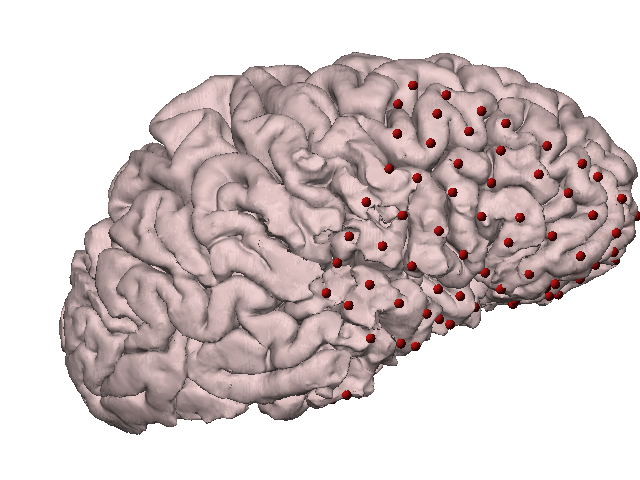

INFO:/home/gio/projects/spgr/scripts/spgr/read_data.py:MG63 analysis chan 99, with location 99


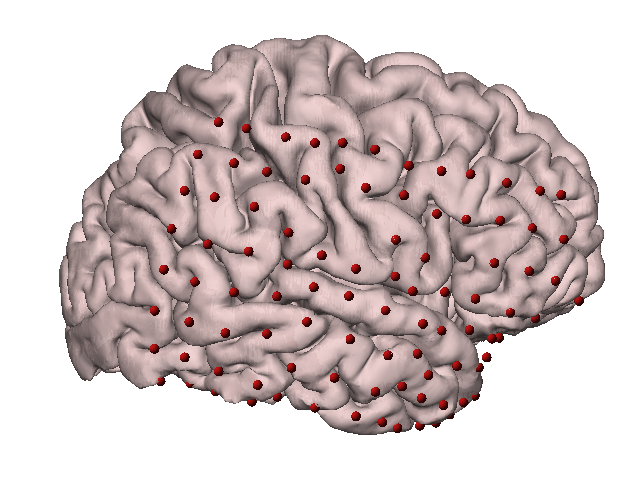

INFO:/home/gio/projects/spgr/scripts/spgr/read_data.py:MG33 analysis chan 64, with location 64


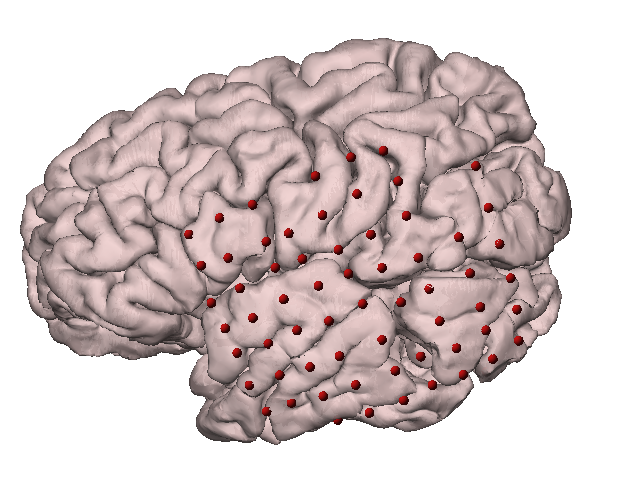

INFO:/home/gio/projects/spgr/scripts/spgr/read_data.py:MG17 analysis chan 104, with location 104


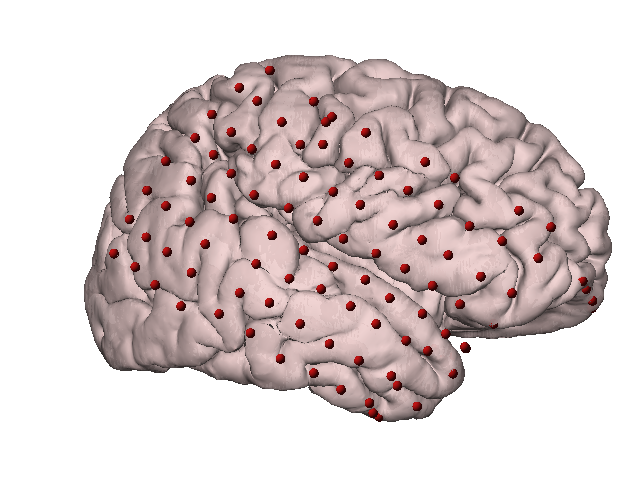

INFO:/home/gio/projects/spgr/scripts/spgr/read_data.py:MG37 analysis chan 78, with location 78


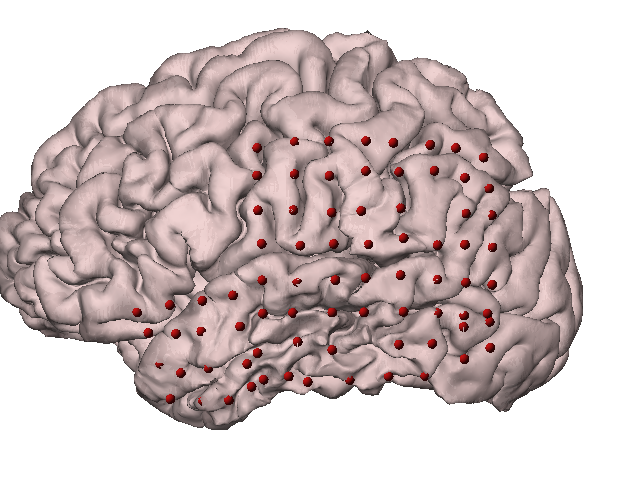

INFO:/home/gio/projects/spgr/scripts/spgr/read_data.py:MG61 analysis chan 103, with location 103


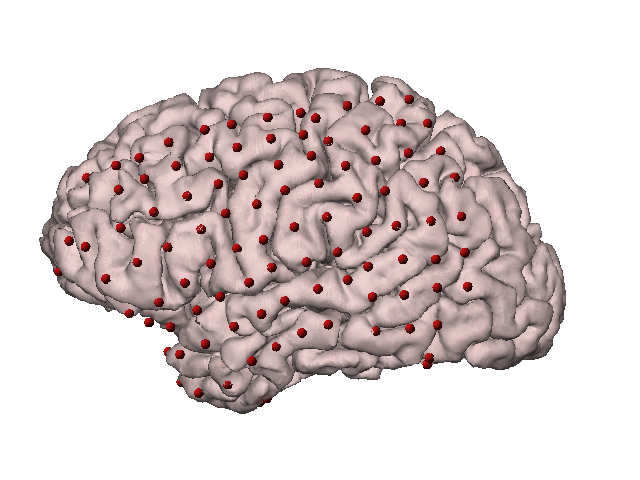

In [47]:
for subj, hemi in hemi_subj.items():
    chan = get_chan_used_in_analysis(subj, 'sleep', chan_type, **options)[1]
    fs = Freesurfer(str(REC_DIR.joinpath(subj).joinpath(FS_PATH)))
    surf = getattr(fs.read_brain(), hemi)
    v = Viz3(color='kw')
    v.add_chan(chan, color=(200, 20, 20, 255))
    v.add_surf(surf, color=SKIN_COLOR)
    v.save(str(images_dir.joinpath(subj + '.png')))
    display(v)

## Coverage

In [1]:
from os import listdir, makedirs
from os.path import join

In [ ]:
from numpy import NaN, atleast_2d, sum, histogram, log, nanmin, nanmax, median, nanmean, where, isnan, nansum, empty, ones

In [ ]:
from phypno import Data
from phypno.attr import Freesurfer
from phypno.source import Linear, Morph
from phypno.viz.plot_3d import Viz3

In [ ]:
from spgr.read_data import DATA_DIR, REC_DIR, FS_PATH, get_chan_used_in_analysis

In [ ]:
all_subj = sorted(listdir(DATA_DIR))

hemi_subj = {'EM09': 'rh', 
             'MG17': 'rh',
             'MG33': 'lh',
             'MG37': 'lh',
             'MG61': 'lh',
             'MG63': 'rh',
             }

options = {'reref': 'avg',
           'resample_freq': 256,
           'hp_filter': 0.5,
           'lp_filter': 50,
           }

chan_type = ('grid', 'strip')

In [ ]:
STD = 10
THRESHOLD = 20

In [ ]:
all_elec = []

for subj in all_subj:

    chan = get_chan_used_in_analysis(subj, 'sleep', chan_type, **options)[1]
    if hemi_subj[subj] == 'lh':
        for one_chan in chan.chan:
            one_chan.xyz *= (-1, 1, 1)

    data = Data(ones(chan.n_chan), chan=chan.return_label())

    fs = Freesurfer(join(REC_DIR, subj, FS_PATH))
    surf = fs.read_surf('rh')
    l = Linear(surf, chan, std=STD, threshold=THRESHOLD)
    m = Morph(surf)
    
    all_elec.append(m(l(data)))

In [ ]:
from copy import deepcopy
from numpy import nansum, NaN, asarray

avg_elec = deepcopy(all_elec[0])
avg_elec.data[0] = nansum(asarray([x.data[0] for x in all_elec]), axis=0)

In [ ]:
fs_avg = Freesurfer('/home/gio/recordings/EM09/mri/proc/fsaverage')
surf_avg = fs_avg.read_surf('rh', surf_type='pial')
v = Viz3()
v.add_surf(surf_avg, values=avg_elec(trial=0)[163842:], limits_c=(0, 6), colormap='cool')
v